In [155]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced data visualization
import numpy as np #For mathematic calculation

In [156]:
# Loadig the dataset
# The dataset contains credit card transactions labeled as fraudulent or non-fraudulent
df = pd.read_csv('creditcard.csv')

In [157]:
df.head()# Display the first few rows of the dataset to understand its structure

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [158]:
df.shape # Display total number of column and row

(284807, 31)

Dataset Overview:
The dataset contains 284,807 rows and 31 columns.

Columns include: 

Time: Transaction time.

V1 to V28: PCA-transformed features.

Amount: Transaction amount.

Class: Target variable (0 = Normal, 1 = Fraudulent).

In [159]:
df.info()# Display basic information about the dataset, including column types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [160]:
# Display statistical summary of numerical columns (mean, standard deviation, min, max, etc.)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [161]:
#  Check for missing values in the dataset
print("Missing values:", df.isnull().sum().sum())

Missing values: 0


We checked the dataset and found no missing values

Handling duplicates


In [162]:
#check the dublicate rows in the dataset
dublicate_values=df.duplicated().sum()
print("Total Dublicate Rows in the Dataset",dublicate_values)
#drop all the dublicate values
df=df.drop_duplicates()
df.head()


Total Dublicate Rows in the Dataset 1081


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


we observe that there are 1,081 duplicate rows, so we will drop them from the dataset.

In [163]:
df.shape

(283726, 31)

Feature Engineering

In [164]:
df["Hour"] = (df["Time"] // 3600) % 24# Convert 'Time' to hours
df["Transaction_Freq"] = df.groupby("Hour")["Hour"].transform("count")# Transaction frequency per hour
df["Log_Amount"] = df["Amount"].apply(lambda x: np.log1p(x))# Log transformation of 'Amount'
df.drop(columns=["Time"], inplace=True)# Drop original 'Time' column

Checking Dataset is Balanced or Imbalanced

In [165]:
classes=df['Class'].value_counts()
print(f'Normal Transaction ={classes[0]}')
print(f'Fraud Transactions ={classes[1]}')
print(f'Percentage Normal Tranactions ={(classes[0] / df["Class"].count())*100:.1f}%')
print(f'Percentage Fraud Transactions ={(classes[1] / df["Class"].count())*100:.1f}%')

Normal Transaction =283253
Fraud Transactions =473
Percentage Normal Tranactions =99.8%
Percentage Fraud Transactions =0.2%


The dataset is highly imbalanced with 99.8% normal transactions and 0.2% fraudulent transactions. This imbalance could affect model performance

Exploratory Data Analysis (EDA)

C:\Users\shaws\AppData\Local\Temp\ipykernel_27320\3190858575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=["blue", "red"])# Create a bar plot to visualize the distribution of fraud (1) and normal (0) transactions


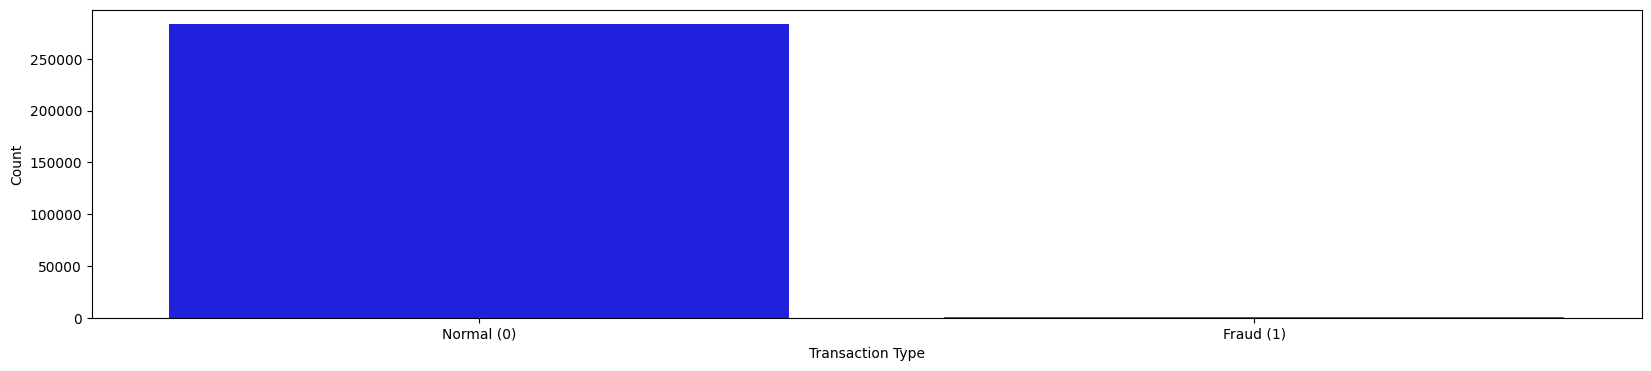

In [166]:
class_counts = df['Class'].value_counts()# Count the number of occurrences of each class (0: Normal, 1: Fraud)
plt.figure(figsize=(20,4))# Set the figure size for better visualization
sns.barplot(x=class_counts.index, y=class_counts.values, palette=["blue", "red"])# Create a bar plot to visualize the distribution of fraud (1) and normal (0) transactions
plt.xticks(ticks=[0, 1], labels=['Normal (0)', 'Fraud (1)'])# Set custom labels for the x-axis to clearly indicate transaction types
plt.xlabel("Transaction Type")# Label for the x-axis
plt.ylabel("Count")# Label for the y-axis
plt.show()# Display the plot

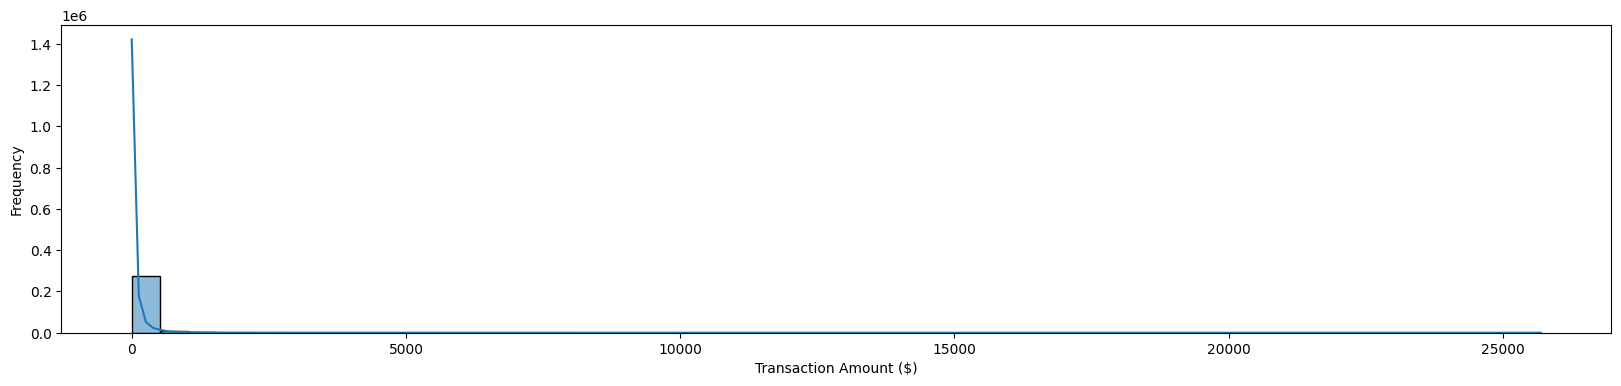

In [167]:
# Transaction Amount Distribution
plt.figure(figsize=(20,4))# Set the figure size for better visualization
sns.histplot(df['Amount'], bins=50, kde=True)#A bell-shaped curve suggests a normal distribution.
plt.xlabel("Transaction Amount ($)")# Label for the x-axis
plt.ylabel("Frequency")# Label for the y-axis
plt.show()# Display the plot


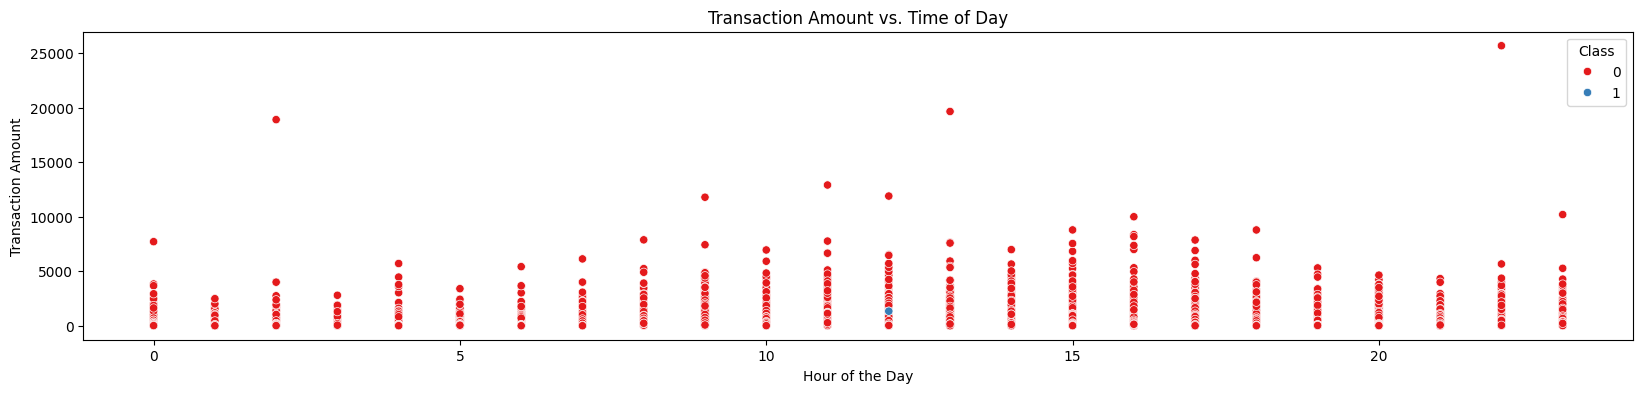

In [168]:
plt.figure(figsize=(20, 4))  # Set the figure size for better visualization
sns.scatterplot(data=df, x='Hour', y='Amount', hue='Class', palette='Set1')  

plt.xlabel('Hour of the Day')  # Label for the x-axis
plt.ylabel('Transaction Amount')  # Label for the y-axis
plt.title('Transaction Amount vs. Time of Day')  # Title for the plot
plt.legend(title="Class")  # Legend for fraud vs. non-fraud transactions
plt.show()


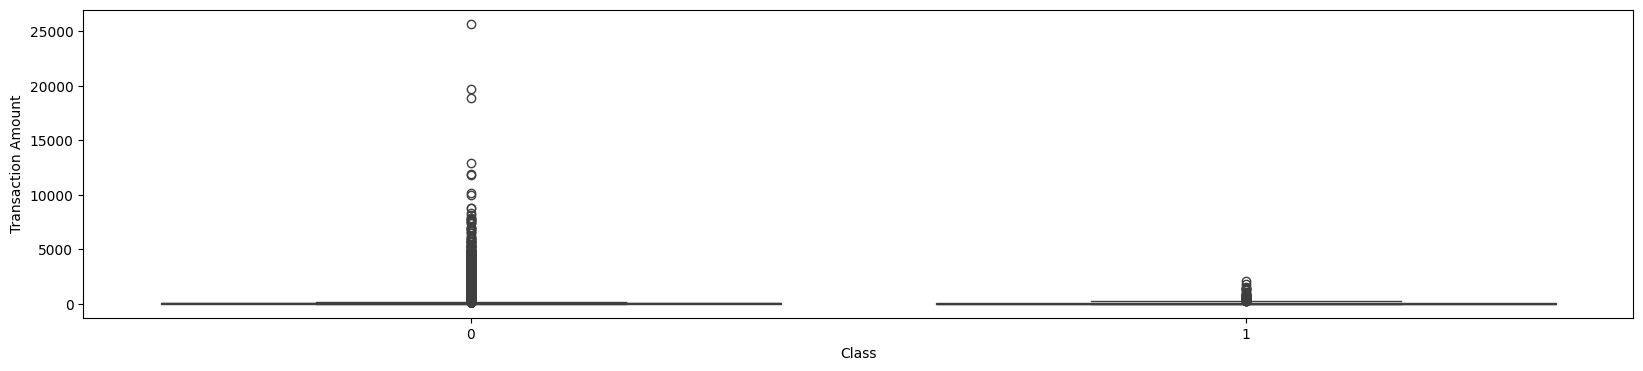

In [169]:
plt.figure(figsize=(20, 4))# Set the figure size for better visualization
sns.boxplot(data=df, x='Class', y='Amount' )# Create a bar plot to visualize the distribution of fraud (1) and normal (0) transactions vs amount
plt.xlabel('Class')# Label for the x-axis
plt.ylabel('Transaction Amount')# Label for the x-axis
plt.show()# Display the plot

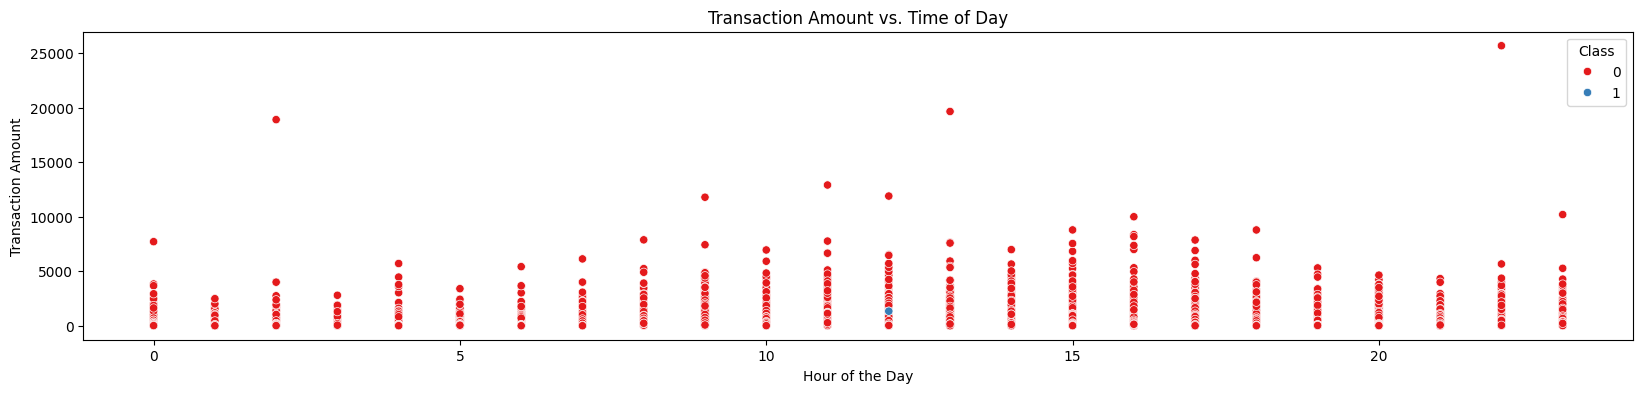

In [170]:

plt.figure(figsize=(20, 4))  # Set the figure size for better visualization
sns.scatterplot(data=df, x='Hour', y='Amount', hue='Class', palette='Set1')#scatter plot to visualize fraudulent transactions based on time and amount

plt.xlabel('Hour of the Day')  # Label for the x-axis
plt.ylabel('Transaction Amount')  # Label for the y-axis
plt.title('Transaction Amount vs. Time of Day')  # Title for the plot
plt.legend(title="Class")  # Legend for fraud vs. non-fraud transactions
plt.show()


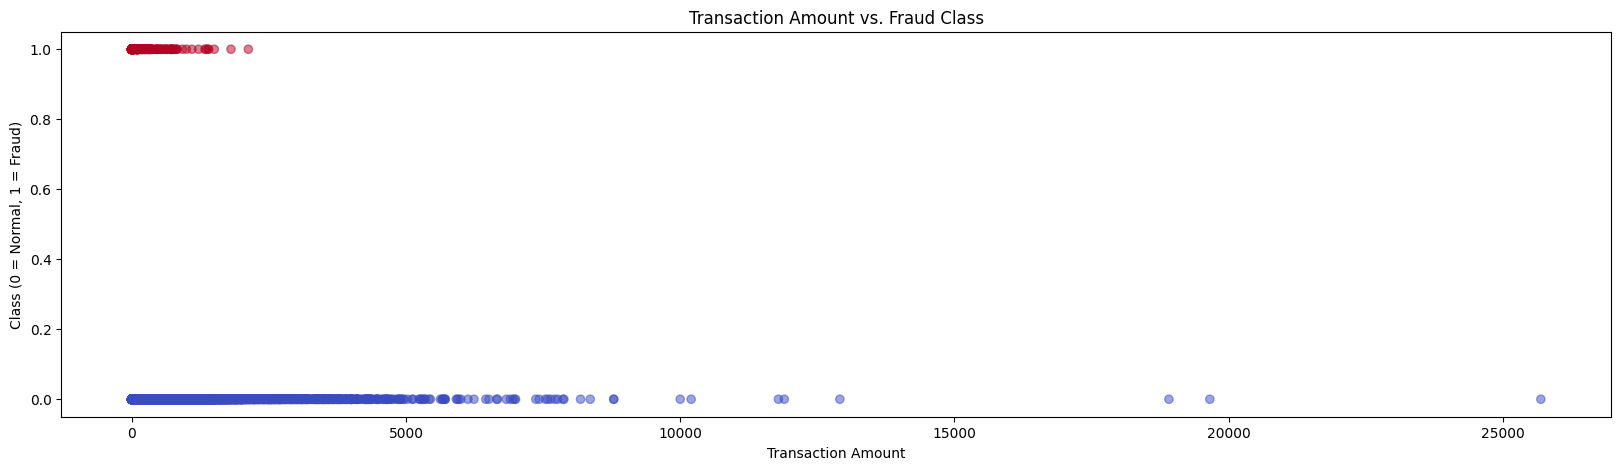

In [171]:
plt.figure(figsize=(20, 5))  # Set the figure size for better visualization
plt.scatter(df["Amount"], df["Class"], c=df["Class"], cmap="coolwarm", alpha=0.5)# Scatter plot with transaction amount vs. fraud class
plt.xlabel("Transaction Amount")  # Label for the x-axis
plt.ylabel("Class (0 = Normal, 1 = Fraud)")  # Label for the y-axis
plt.title("Transaction Amount vs. Fraud Class")  # Title for the plot
plt.show()


Normalization 

We see that in this dataset, only the "amount" feature has a different range of values. That's why I used RobustScaler. It is used when we don't want to remove outliers, as it scales the data based on the median and the interquartile range, making it less sensitive to extreme values.

In [172]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df[['Amount']]=scaler.fit_transform(df[['Amount']])
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Amount,Class,Hour,Transaction_Freq,Log_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.774718,0,0.0,7647,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.268530,0,0.0,7647,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.959811,0,0.0,7647,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.411487,0,0.0,7647,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.141267,-0.206010,0.502292,0.219422,0.215153,0.667362,0,0.0,7647,4.262539


SMOTE 

My dataset was highly imbalanced, so I applied SMOTE to balance the data

In [173]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [174]:
X = df.drop(columns='Class', axis=1)# Define X (features) by dropping the 'Class' column from the dataset
Y = df['Class']# Define Y (target variable) as the 'Class' column

In [175]:
# Handling class imbalance using SMOTE
print("Before SMOTE:", Counter(Y))
smote = SMOTE(sampling_strategy=0.1, random_state=42)  # Adjust sampling strategy as needed
X,Y = smote.fit_resample(X, Y)
print("After SMOTE:", Counter(Y))

Before SMOTE: Counter({0: 283253, 1: 473})
After SMOTE: Counter({0: 283253, 1: 28325})


In [176]:
from sklearn.model_selection import train_test_split# Import function to split dataset into training and testing sets
from sklearn.linear_model import LogisticRegression # Import Logistic Regression model for classification
from sklearn.metrics import accuracy_score# Import function to calculate accuracy of the model
from sklearn.metrics import classification_report, roc_auc_score


In [177]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
 #Split the dataset into training and testing sets 20% of the data will be used for testing, 80% for training

In [178]:
print(X.shape, X_train.shape, X_test.shape)# Shape of the original feature dataset, training feature set and testing feature set 

(311578, 32) (249262, 32) (62316, 32)


In [179]:
model = LogisticRegression()# creating the model

In [180]:
model.fit(X_train, Y_train)# Train (fit) the machine learning model using the training dataset

c:\Users\shaws\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [181]:
X_train_prediction = model.predict(X_train)# Use the trained model to make predictions on the training dataset
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)# Calculate the accuracy of the model on the training data

In [182]:
print('Accuracy on Training data : ', training_data_accuracy)# accuracy of the model on the training data

Accuracy on Training data :  0.986379793149377


In [183]:
X_test_prediction = model.predict(X_test)# Use the test model to make predictions on the training dataset
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)# Calculate the accuracy of the model on the test data

In [184]:
print('Accuracy score on Test Data : ', test_data_accuracy)# accuracy of the model on the test data

Accuracy score on Test Data :  0.9865363630528275


Fraud detection model using logistic regression has been successfully implemented with the following conclusions:

Class Imbalance Handling
The original dataset was highly imbalanced, which could have negatively impacted model performance.
SMOTE was applied to oversample the minority (fraudulent) class, improving the model’s ability to detect fraud.

Feature Engineering
Hour-based analysis was introduced by converting the Time column into an hourly feature.
Transaction Frequency per Hour was computed to capture patterns in transaction behavior.
Log transformation was applied to the Amount column to reduce skewness and improve model performance.

Model Performance
Classification Report shows the effectiveness of the model in identifying fraudulent transactions.

Potential Enhancements
Experiment with more advanced models such as Random Forest, XGBoost, or Neural Networks for better fraud detection.
Apply feature selection techniques to eliminate redundant features and improve efficiency.
Fine-tune SMOTE parameters to avoid overfitting and ensure better generalization.
Perform hyperparameter tuning on logistic regression to optimize its performance.